# Code Begins Here:

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random 
import torch
from torch import autograd
import torch.nn.functional as F

Importing and Preparing Data

In [138]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
label_ids,count=np.unique(labels,return_counts=True)
print(label_ids,count)


(array([0, 1, 2, 3, 4], dtype=uint8), array([10000, 10000, 10000, 10000, 10000]))


In [139]:
shape_images_flat=(images.shape[0],images.shape[1]*images.shape[2])
images_normal=np.ndarray(shape=shape_images_flat)

# normalizing images
for index in range(len(images)):
    images_normal[index]=((images[index]-images[index].mean())/images[index].std()).flat

#  braking data set into train,validation and test sets
train_images=images_normal[0:40000]
train_labels=labels[0:40000]

validation_images=images_normal[40000:45000]
validation_labels=labels[40000:45000]

test_images=images_normal[45000:50000]
test_labels=labels[45000:50000]



In [140]:
def accuracy(y, y_hat):
    a=(y==y_hat)
    return a.astype(np.float).mean()

In [141]:
def approx_accuracy(curr_images,curr_labels,length=-1):
    if length==-1:
        length=len(curr_images)
        
    shuffle_list=np.random.choice(len(curr_images), length)
    shuffled_images=curr_images[shuffle_list]
    shuffled_labels=curr_labels[shuffle_list]
    
    x = autograd.Variable(torch.from_numpy(shuffled_images.astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(shuffled_labels.astype(np.int)))
    _,y_hat =torch.max(model(x),1)
    # print(y_hat.size())
    return accuracy(y.data.numpy(), y_hat.data.numpy())
         

In [142]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_images.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_images[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    
    optimizer.step()
    return loss.data[0]


# Three Layer - NN Parameters

In [120]:
batch_size=20
learning_rate=1e-3
NUM_OPT_STEPS=10000

HEIGHT,WIDTH=26,26
NUM_CLASSES=5
NUM_HIDDEN_UNITS_1=200
NUM_HIDDEN_UNITS_2=100
# NUM_OPT_STEPS=train_labels.shape[0]/batch_size

In [121]:
class ThreeLayerNN(torch.nn.Module):
    def __init__(self):
        super(ThreeLayerNN,self).__init__()
        self.model=torch.nn.Sequential(
        torch.nn.Linear(HEIGHT*WIDTH,NUM_HIDDEN_UNITS_1),
        torch.nn.ReLU(),
        torch.nn.Linear(NUM_HIDDEN_UNITS_1,NUM_HIDDEN_UNITS_2),
        torch.nn.ReLU(),
        torch.nn.Linear(NUM_HIDDEN_UNITS_2, NUM_CLASSES)
        )
        
    def forward(self, x):
        return self.model(x)

In [122]:
model=ThreeLayerNN()
print(model)

ThreeLayerNN (
  (model): Sequential (
    (0): Linear (676 -> 200)
    (1): ReLU ()
    (2): Linear (200 -> 100)
    (3): ReLU ()
    (4): Linear (100 -> 5)
  )
)


In [118]:
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)


# Three Layer NN- Accuracy

In [81]:
train_accs, val_accs = [], [] 
for i in range(NUM_OPT_STEPS):
    train(batch_size)    
    if i % 100 == 0:
        train_accs.append(approx_accuracy(train_images,train_labels,1000))
        val_accs.append(approx_accuracy(validation_images,validation_labels))
        if (i%1000==0):
            print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))


     0  0.26  0.28
  1000  0.82  0.83
  2000  0.88  0.84
  3000  0.89  0.85
  4000  0.89  0.86
  5000  0.89  0.85
  6000  0.92  0.86
  7000  0.91  0.87
  8000  0.93  0.85
  9000  0.94  0.86


  9999  0.94  0.87


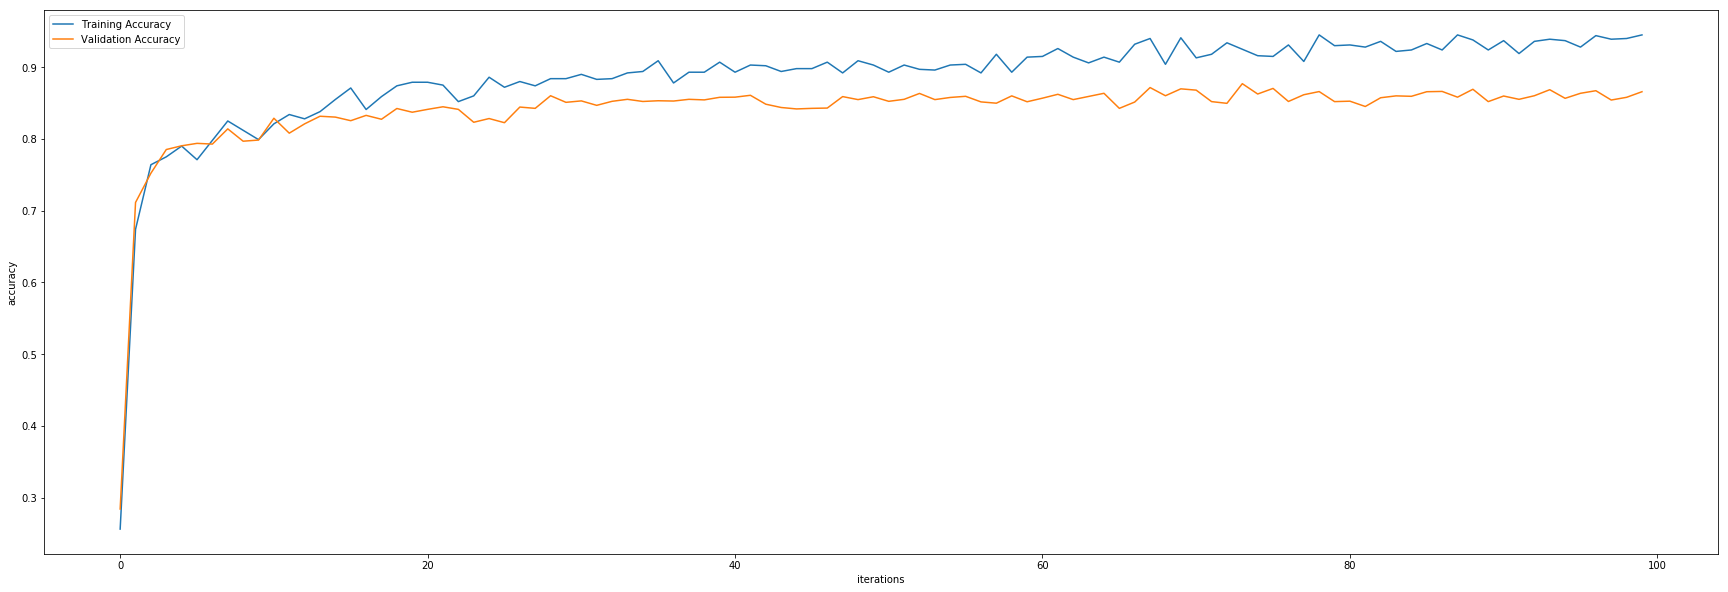

In [85]:
print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))
plt.figure(figsize=(30, 10))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(train_accs,label='Training Accuracy')
validation_accuracy_line,=plt.plot(val_accs,label='Validation Accuracy')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

## Four Layer NN - PARAMETERS

In [105]:
batch_size=50
learning_rate=1e-3
NUM_OPT_STEPS=15000

HEIGHT,WIDTH=26,26
NUM_CLASSES=5
NUM_HIDDEN_UNITS_1=200
NUM_HIDDEN_UNITS_2=100
NUM_HIDDEN_UNITS_3=50
# NUM_OPT_STEPS=train_labels.shape[0]/batch_size

In [106]:
class FourLayerNN(torch.nn.Module):
    def __init__(self):
        super(FourLayerNN,self).__init__()
        self.model=torch.nn.Sequential(
        torch.nn.Linear(HEIGHT*WIDTH,NUM_HIDDEN_UNITS_1),
        torch.nn.ReLU(),
        torch.nn.Linear(NUM_HIDDEN_UNITS_1,NUM_HIDDEN_UNITS_2),
        torch.nn.ReLU(),
        torch.nn.Linear(NUM_HIDDEN_UNITS_2, NUM_HIDDEN_UNITS_3),
        torch.nn.ReLU(),
        torch.nn.Linear(NUM_HIDDEN_UNITS_3, NUM_CLASSES)
        )
        
    def forward(self, x):
        return self.model(x)

In [107]:
model=FourLayerNN()
print(model)

FourLayerNN (
  (model): Sequential (
    (0): Linear (676 -> 200)
    (1): ReLU ()
    (2): Linear (200 -> 100)
    (3): ReLU ()
    (4): Linear (100 -> 50)
    (5): ReLU ()
    (6): Linear (50 -> 5)
  )
)


In [108]:
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)


# Four Layer Accuracies:

In [109]:
train_accs, val_accs = [], [] 
for i in range(NUM_OPT_STEPS):
    train(batch_size)    
    if i % 100 == 0:
        train_accs.append(approx_accuracy(train_images,train_labels,1000))
        val_accs.append(approx_accuracy(validation_images,validation_labels))
        if i%1000 == 0:
            print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))


     0  0.34  0.37
  1000  0.85  0.83
  2000  0.90  0.86
  3000  0.92  0.85
  4000  0.93  0.86
  5000  0.95  0.86
  6000  0.96  0.86
  7000  0.96  0.86
  8000  0.96  0.87
  9000  0.97  0.86
 10000  0.97  0.87
 11000  0.98  0.87
 12000  0.98  0.86
 13000  0.98  0.87
 14000  0.99  0.86


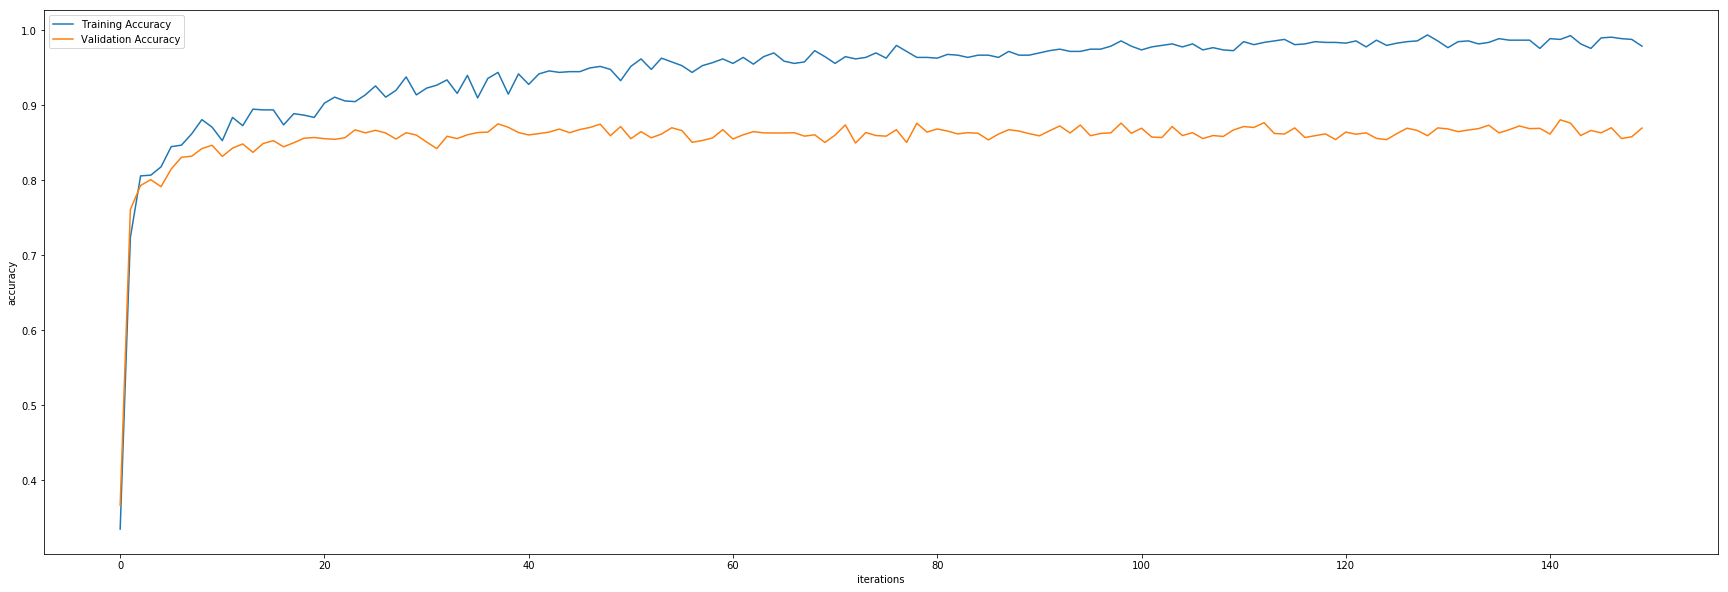

In [112]:
plt.figure(figsize=(30, 10))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(train_accs,label='Training Accuracy')
validation_accuracy_line,=plt.plot(val_accs,label='Validation Accuracy')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

# Drop-Out

In [143]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_images.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_images[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    
    optimizer.step()
    return loss.data[0]

In [144]:
batch_size=20
learning_rate=1e-3
NUM_OPT_STEPS=10000

HEIGHT,WIDTH=26,26
NUM_CLASSES=5
NUM_HIDDEN_UNITS_1=200
NUM_HIDDEN_UNITS_2=100
# NUM_OPT_STEPS=train_labels.shape[0]/batch_size

In [145]:
class ThreeLayer_DROP_NN(torch.nn.Module):
    def __init__(self):
        super(ThreeLayer_DROP_NN,self).__init__()
        self.model=torch.nn.Sequential(
        torch.nn.Linear(HEIGHT*WIDTH,NUM_HIDDEN_UNITS_1),
        torch.nn.ReLU(),
        torch.nn.Linear(NUM_HIDDEN_UNITS_1,NUM_HIDDEN_UNITS_2),
        torch.nn.ReLU(),
        torch.nn.Linear(NUM_HIDDEN_UNITS_2, NUM_CLASSES)
        )
        
    def forward(self, x):
        return self.model(x)

In [146]:
model=ThreeLayer_DROP_NN()
print(model)
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

ThreeLayer_DROP_NN (
  (model): Sequential (
    (0): Linear (676 -> 200)
    (1): ReLU ()
    (2): Linear (200 -> 100)
    (3): ReLU ()
    (4): Linear (100 -> 5)
  )
)


# Hinge Loss -Accuracy

In [ ]:
train_accs, val_accs = [], [] 
for i in range(NUM_OPT_STEPS):
    train(batch_size)    
    if i % 100 == 0:
        train_accs.append(approx_accuracy(train_images,train_labels,1000))
        val_accs.append(approx_accuracy(validation_images,validation_labels))
        if i%1000 == 0:
            print("%6d %5.2f %5.2f" % ( i, train_accs[-1], val_accs[-1]))


# Highest train and validation accuracies obtained. 
The train and validation accuracies obtained were : 0.90 0.83

batch_size=40

NUM_OPT_STEPS=10000

learning rate=1e-3